This notebook shows an example of the data that's tracked and some visualizations that can be made. 

# Setup

In [1]:
from fallGuysStructures import *
from fallGuysFcns import *
import fallGuysVisuals as fgv

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, datetime
import pandas as pd
import numpy as np

# Some setup
plt.rcParams['font.size'] = 14

shows_df, rounds_df, qual_df = getDataFrames(testing=True) # would want to get rid of testing=True for others

finals_df = rounds_df[np.isin(rounds_df['Map'], list_of_finals)] # just finals
non_finals_df = rounds_df[~np.isin(rounds_df['Map'], list_of_finals)] # remove finals

In [2]:
shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards
544,545,2021-03-31 22:39:27.005000,4,140.635,squads_4player_2203_to_0404_2021,False,1,Infallible Laughing Penguin,1,03:41:47.640,30,30,0,46.0
545,546,2021-03-31 22:42:33.025000,4,161.190,squads_4player_2203_to_0404_2021,False,1,Infallible Laughing Penguin,1,03:45:14.044,30,30,0,46.0
546,547,2021-03-31 22:46:44.378000,4,421.207,squads_4player_2203_to_0404_2021,False,3,Infallible Laughing Penguin,1,03:53:45.585,180,106,0,46.0
547,548,2021-03-31 22:54:29.553000,4,393.410,main_show,False,3,Infallible Laughing Penguin,1,04:01:02.594,250,141,0,46.0
548,549,2021-03-31 23:01:45.428000,4,745.262,main_show,True,5,Infallible Laughing Penguin,1,04:14:10.690,475,243,0,46.0


In [3]:
rounds_df.tail(10)

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Normalized Position
1800,547,1,round_tunnel_squads,90.410,90.46,True,11,20,20,0.0,35,18,gold,32,0,0.0,313.0,34.38
1801,547,2,round_snowballsurvival_squads,60.200,60.25,False,14,60,20,3.0,0,0,NaN,20,0,0.0,192.0,70.00
1802,548,0,round_see_saw,91.887,118.454,True,13,30,30,2.0,35,18,bronze,47,73,35.0,NaN,27.66
1803,548,1,round_skeefall,30.119,65.208,True,1,20,20,0.0,105,53,gold,35,60,21.0,NaN,2.86
1804,548,2,round_rocknroll,46.275,46.282,False,17,60,20,3.0,0,0,NaN,21,100,14.0,68.0,80.95
1805,549,0,round_gauntlet_04,43.603,83.42,True,3,30,30,1.0,70,35,silver,60,73,44.0,NaN,5.00
1806,549,1,round_gauntlet_06,74.203,123.172,True,8,20,20,1.0,70,35,silver,43,73,32.0,NaN,18.60
1807,549,2,round_tunnel_race,46.670,65.471,True,6,60,20,1.0,70,35,silver,32,75,24.0,NaN,18.75
1808,549,3,round_territory_control,100.380,100.55,True,7,50,20,2.0,35,18,bronze,22,100,0.0,277.0,31.82
1809,549,4,round_jump_showdown,57.334,uncertain,False,4,70,30,3.0,0,0,NaN,11,0,1.0,NaN,36.36


# Map Stats

In [4]:
# Get a DataFrame containing info for each different map
maps_df = getMapInfoDataFrame(rounds_df, qual_df)
maps_df.head(10)

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_01,Hex-A-Gone 1 (Hex-a-gone Trials),Survival,106,95,89.622642,8.783019,7.747368,39.011684,41.069832,14.903,41.075474,6505,1740,61.367925,16.415094,NaN,95,0,0,0.311321
round_floor_fall_event_only_02,Hex-A-Gone 2 (Hex-a-gone Trials),Survival,95,78,82.105263,5.978947,4.769231,32.352949,65.088449,48.504,65.094564,4630,1276,48.736842,13.431579,NaN,78,0,0,0.536842
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,75,8,10.666667,4.333333,1.000000,11.283750,129.215625,118.136,129.217875,10380,783,138.400000,10.440000,NaN,8,0,0,2.680000
round_biggestfan,Big Fans,Race,62,62,100.000000,8.629032,8.629032,17.553871,84.016242,55.290,177.049758,5315,2726,85.725806,43.967742,NaN,2,43,15,1.274194
round_thin_ice_event_only_01,Thin Ice (Thin Ice Trials),Survival,55,51,92.727273,9.709091,9.078431,46.093725,37.363157,18.158,37.380275,3435,0,62.454545,0.000000,NaN,51,0,0,0.218182
round_thin_ice_event_only_02,Thin Ice (Thin Ice Trials),Survival,51,43,84.313725,5.568627,4.511628,31.208605,67.638000,32.418,67.618279,2525,0,49.509804,0.000000,NaN,43,0,0,0.470588
round_jump_club_event_only_01,Jump Club 1 (Jump Around),Survival,50,47,94.000000,11.600000,10.680851,35.570638,36.650574,26.872,36.668128,3145,474,62.900000,9.480000,NaN,47,0,0,0.180000
round_wall_guys,Wall Guys,Race,49,35,71.428571,9.591837,6.657143,30.504000,78.899971,39.903,98.319486,4175,1712,85.204082,34.938776,NaN,2,10,17,2.122449
round_jump_club_event_only_02,Jump Club 2 (Jump Around),Survival,47,44,93.617021,10.659574,9.977273,43.405909,33.680409,24.956,33.718886,2480,306,52.765957,6.510638,NaN,44,0,0,0.191489
round_gauntlet_04,Knight Fever,Race,44,44,100.000000,10.545455,10.545455,20.295909,56.461136,42.153,96.982636,3515,1940,79.886364,44.090909,NaN,6,16,19,1.431818


# Round Stats

In [5]:
# Get a DataFrame containing info for each round number 
# (if a final occurs during round 5, that data is in 'final' and not '5')

# Give a switch to say if finals should be separate or not?
rounds_data_df = getRoundInfoDataFrame(rounds_df)
rounds_data_df

,Attempted,Qualified,Percent
Round Num,,,
1,549,509,92.714026
2,509,427,83.889980
3,302,227,75.165563
4,173,104,60.115607
5,10,4,40.000000
final,267,33,12.359551


# Show Stats

In [6]:
# Get a DataFrame containing info for shows by season and total

# add new things to 'getShowStats'
shows_info_df = getShowsInfoDataFrame(shows_df)
shows_info_df

,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
2,117,8,47,598.054487,3.931624,360.811966,153.965812,40.170940,6.837607,19.436771,145.775781
3,318,23,206,389.181107,3.163522,265.235849,64.427673,64.779874,7.547170,34.377664,85.944161
4,114,2,37,459.805079,3.017544,239.429825,127.526316,32.456140,1.754386,14.560494,436.814825
total,549,33,290,448.360193,3.296903,280.245902,96.612022,52.823315,6.193078,68.374929,120.661640


# Playlist Stats

In [7]:
# Get a DataFrame containing info for shows by playlist and total
playlist_df = getPlaylistInfoDataFrame(shows_df, rounds_df)
playlist_df

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:415: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
main_show,222,18,95,583.530707,3.923423,366.846847,164.126126,42.792793,8.558559,35.984394,113.634927
event_only_hard_mode_2111_to_2711,2,0,0,325.063500,2.500000,132.500000,61.500000,0.000000,0.000000,0.180591,inf
event_season_3_highlight_1512_to_1912,9,0,5,571.339111,4.111111,305.555556,163.666667,55.555556,0.000000,1.428348,inf
event_only_floor_fall_0501_to_0701,37,1,32,340.677270,2.810811,184.054054,103.216216,86.486486,2.702703,3.501405,210.084317
event_fruit_basket_0801_to_1401,1,0,1,310.640000,3.000000,180.000000,106.000000,100.000000,0.000000,0.086289,inf
event_only_survival_2501_to_0102_2021,3,0,0,390.081333,2.666667,171.666667,104.666667,0.000000,0.000000,0.325068,inf
event_only_season_3_variation_0202_to_0702_2021,3,0,1,431.502000,3.333333,208.333333,118.333333,33.333333,0.000000,0.359585,inf
event_fan_favourites_0802_to_1102_2021,7,0,3,492.582571,3.285714,220.714286,121.857143,42.857143,0.000000,0.957799,inf
event_only_jump_club_1202_to_1402_2021,44,0,31,316.750114,3.500000,223.181818,26.954545,70.454545,0.000000,3.871390,inf
event_only_races_any_final_1502_to_1802_2021,1,0,0,593.942000,4.000000,265.000000,0.000000,0.000000,0.000000,0.164984,inf


# Squad Mode Stats

In [8]:
squad_shows_df, squad_rounds_df = getSquadDataFrames(shows_df, rounds_df)
squad_shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards,Wins
538,539,2021-03-30 22:29:32.106000,4,416.190,squads_4player_2203_to_0404_2021,False,3,Infallible Laughing Penguin,1,03:36:28.296,180,105,0,46.0,0
539,540,2021-03-30 22:37:22.213000,4,355.890,squads_4player_2203_to_0404_2021,False,2,Infallible Laughing Penguin,1,03:43:17.302,120,85,0,46.0,0
544,545,2021-03-31 22:39:27.005000,4,140.635,squads_4player_2203_to_0404_2021,False,1,Infallible Laughing Penguin,1,03:41:47.640,30,30,0,46.0,0
545,546,2021-03-31 22:42:33.025000,4,161.190,squads_4player_2203_to_0404_2021,False,1,Infallible Laughing Penguin,1,03:45:14.044,30,30,0,46.0,0
546,547,2021-03-31 22:46:44.378000,4,421.207,squads_4player_2203_to_0404_2021,False,3,Infallible Laughing Penguin,1,03:53:45.585,180,106,0,46.0,0


In [9]:
squad_rounds_df.tail()

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Normalized Position
1797,545,0,round_tunnel_race_squads,61.170,86.987,False,37,30,30,3.0,0,0,NaN,40,100,38.0,53.0,92.50
1798,546,0,round_gauntlet_03_squads,60.783,103.184,False,37,30,30,3.0,0,0,NaN,42,100,38.0,36.0,88.10
1799,547,0,round_gauntlet_04_squads,60.268,111.89,True,21,30,30,2.0,35,18,bronze,47,100,45.0,120.0,44.68
1800,547,1,round_tunnel_squads,90.410,90.46,True,11,20,20,0.0,35,18,gold,32,0,0.0,313.0,34.38
1801,547,2,round_snowballsurvival_squads,60.200,60.25,False,14,60,20,3.0,0,0,NaN,20,0,0.0,192.0,70.00


# Other

In [10]:
# Get a DataFrame containing data for only final maps
maps_df[ maps_df['Type'] == 'Final' ]

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,75,8,10.666667,4.333333,1.0,11.283750,129.215625,118.136,129.217875,10380,783,138.400000,10.440000,NaN,8,0,0,2.680000
round_thin_ice_event_only_final,Thin Ice (Thin Ice Trials),Final,43,5,11.627907,4.465116,1.0,11.110000,159.520400,134.553,159.522800,6255,0,145.465116,0.000000,NaN,5,0,0,2.651163
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,37,2,5.405405,5.189189,1.0,10.000000,191.121000,139.286,191.123000,3320,140,89.729730,3.783784,NaN,2,0,0,2.837838
round_floor_fall,Hex-A-Gone,Final,31,2,6.451613,4.000000,1.0,8.330000,106.807000,92.734,106.818000,3630,1026,117.096774,33.096774,NaN,2,0,0,2.806452
round_jump_showdown,Jump Showdown,Final,26,4,15.384615,5.076923,1.0,9.820000,187.000750,142.522,187.005500,4710,1407,181.153846,54.115385,NaN,4,0,0,2.538462
round_fall_mountain_hub_complete,Fall Mountain,Final,24,8,33.333333,3.875000,1.0,11.215000,38.614250,35.305,35.556250,7520,2118,313.333333,88.250000,NaN,8,0,0,2.000000
round_thin_ice,Thin Ice,Final,17,3,17.647059,4.588235,1.0,9.443333,131.022333,105.602,131.025000,3365,889,197.941176,52.294118,NaN,3,0,0,2.470588
round_tunnel_final,Roll Off,Final,11,0,0.000000,4.363636,NaN,NaN,NaN,NaN,NaN,750,320,68.181818,29.090909,NaN,0,0,0,3.000000
round_royal_rumble,Royal Fumble,Final,3,1,33.333333,3.333333,1.0,16.670000,92.772000,92.772,90.400000,905,233,301.666667,77.666667,NaN,1,0,0,2.000000


In [11]:
# Get a Series containing number of times eliminated by map
rounds_df[rounds_df['Qualified'] == False]['Map'].value_counts()

round_floor_fall_event_only_final                 67
round_thin_ice_event_only_final                   38
round_jump_showdown_jump_club_event_only_final    35
round_floor_fall                                  29
round_jump_showdown                               22
                                                  ..
round_tunnel_race                                  1
round_door_dash                                    1
round_gauntlet_05_squads                           1
round_chompchomp                                   1
round_see_saw_squads                               1
Name: Map, Length: 84, dtype: int64

In [12]:
# Get a DataFrame containing the finals that were won
finals_df[finals_df['Qualified']]

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Normalized Position
38,11,4,round_jump_showdown,181.522,181.524,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,10.00
207,54,4,round_fall_mountain_hub_complete,39.191,36.421,True,1,770,210,0.0,35,18,gold,5,0,1.0,NaN,20.00
215,56,4,round_floor_fall,120.880,120.9,True,1,770,210,0.0,35,18,gold,12,0,1.0,NaN,8.33
293,75,4,round_jump_showdown,142.522,142.524,True,1,770,210,0.0,35,18,gold,8,0,1.0,NaN,12.50
298,76,4,round_fall_mountain_hub_complete,38.975,36.203,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,11.11
317,82,4,round_fall_mountain_hub_complete,38.835,36.86,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,11.11
356,91,4,round_fall_mountain_hub_complete,38.281,35.516,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,10.00
416,106,4,round_fall_mountain_hub_complete,35.305,32.538,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,10.00
503,128,4,round_jump_showdown,225.239,225.244,True,1,770,175,0.0,35,18,gold,13,0,1.0,NaN,7.69
534,135,4,round_fall_mountain_hub_complete,39.421,36.672,True,1,770,175,0.0,35,18,gold,12,0,1.0,NaN,8.33


# Visuals

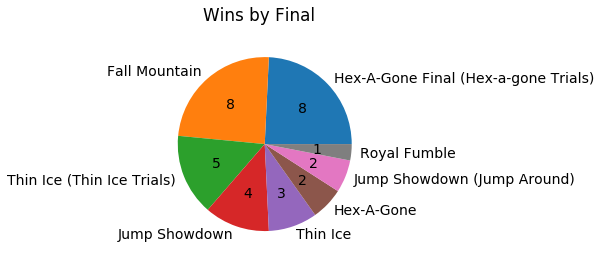

In [13]:
# Get a pie chart for final map wins
fgv.finalMapWinsPie(finals_df);

gold           1
silver        11
bronze        19
none           1
eliminated     9
Name: BadgeId, dtype: int64

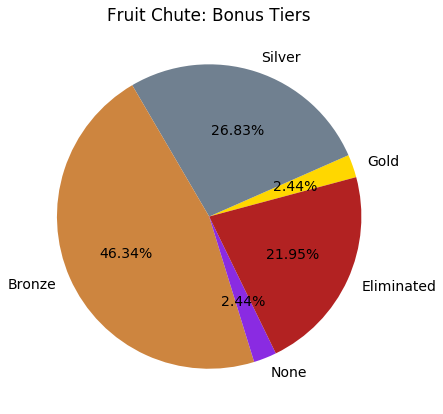

In [14]:
# Get a pie chart for a certain map - bonus tier
# can take either map names or their variables (round_dodge_fall)
fgv.mapBonusTiersPie(rounds_df, 'round_dodge_fall', eliminated=True, percent=True)

main_show                                  17
event_only_floor_fall_2302_to_2502_2021     5
event_only_thin_ice_1903_to_2203_2021       5
event_only_floor_fall_1203_to_1403_2021     2
event_only_jump_club_0603_to_0803_2021      2
event_only_floor_fall_0501_to_0701          1
Name: Game Mode, dtype: int64

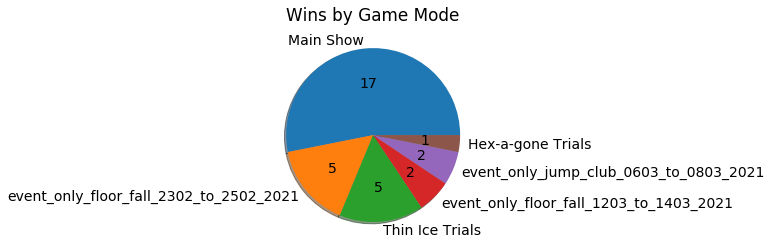

In [15]:
# Get a pie chart for wins by show
fgv.showWinsPie(shows_df)

In [16]:
# Get a Series containing times played each show
# extra for now
shows_df['Game Mode'].value_counts()

main_show                                          222
squads_4player_2203_to_0404_2021                    71
event_only_thin_ice_1903_to_2203_2021               55
event_only_jump_club_1202_to_1402_2021              44
event_only_floor_fall_1203_to_1403_2021             37
event_only_floor_fall_0501_to_0701                  37
event_only_floor_fall_2302_to_2502_2021             32
event_only_survival_1902_to_2202_2021               12
event_season_3_highlight_1512_to_1912                9
event_fan_favourites_0802_to_1102_2021               7
event_only_jump_club_0603_to_0803_2021               6
event_only_season_3_variation_0202_to_0702_2021      3
event_only_season_4_2203_to_2803_2021                3
event_only_survival_2501_to_0102_2021                3
event_only_basketfall_2903_to_3103_2021              2
event_only_hard_mode_2111_to_2711                    2
event_only_races_any_final_1502_to_1802_2021         1
event_twitch_rivals_2303_2021                        1
event_only

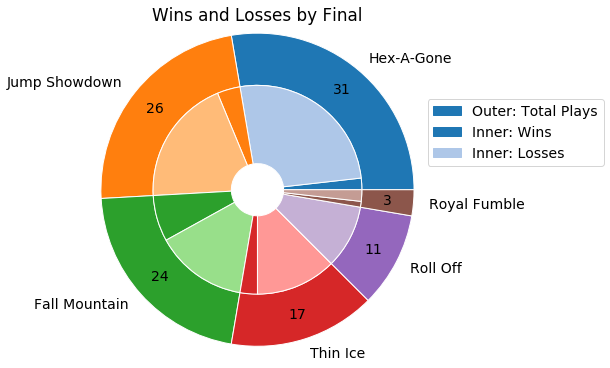

In [17]:
# Get a layered pie chart for plays vs wins and losses by final map
fgv.finalsWinsLossesPie(finals_df, regular=True, total_num=True); 

,overall,pos,neg
round_biggestfan,62,62,0
round_gauntlet_04,44,44,0
round_see_saw,42,42,0
round_gauntlet_01,35,33,2
round_gauntlet_02,31,30,1
round_gauntlet_05,30,30,0
round_door_dash,27,26,1
round_chompchomp,25,24,1
round_gauntlet_03,25,25,0
round_tunnel_race,18,17,1


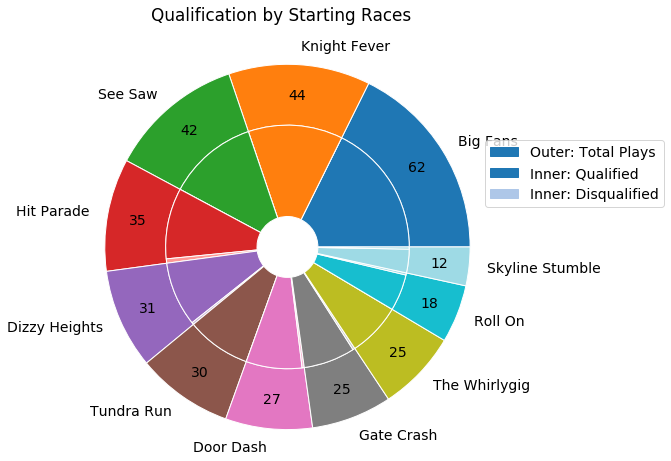

In [18]:
# Get a layered pie chart for qualfied vs non_qualified for starting races
fgv.startingRacesPie(rounds_df, total_num=True, pie_size=(7,7))

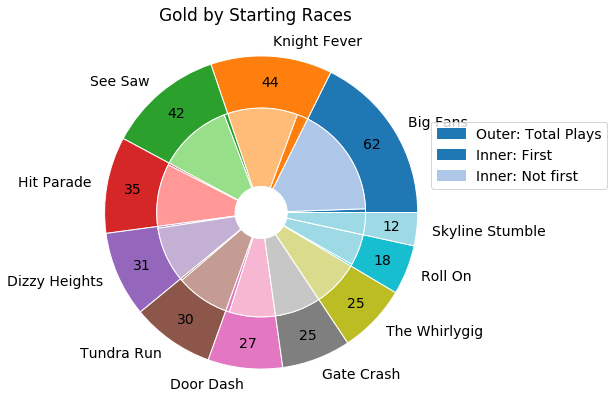

In [19]:
# Get a layered pie chart for gold vs non-gold for starting races
fgv.startingRacesPie(rounds_df, inner='gold', title='Gold by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='First', inner_neg_title='Not first', total_num=True);

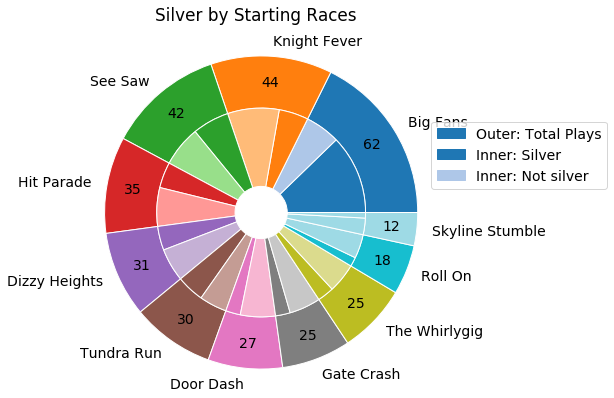

In [20]:
# Get a layered pie chart for silver vs non-silver for starting races
fgv.startingRacesPie(rounds_df, inner='silver', title='Silver by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Silver', inner_neg_title='Not silver', total_num=True);

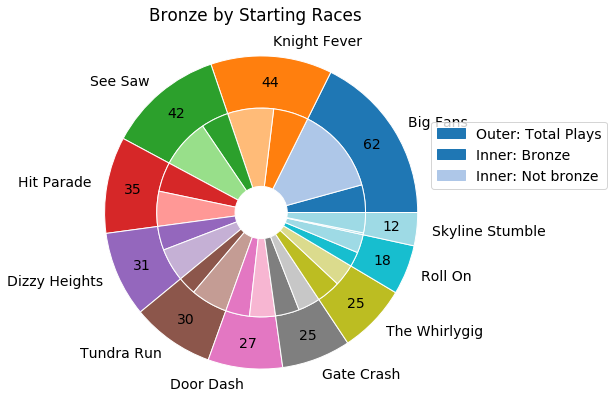

In [21]:
# Get a layered pie chart for bronze vs non-bronze for starting races
fgv.startingRacesPie(rounds_df, inner='bronze', title='Bronze by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Bronze', inner_neg_title='Not bronze', total_num=True);

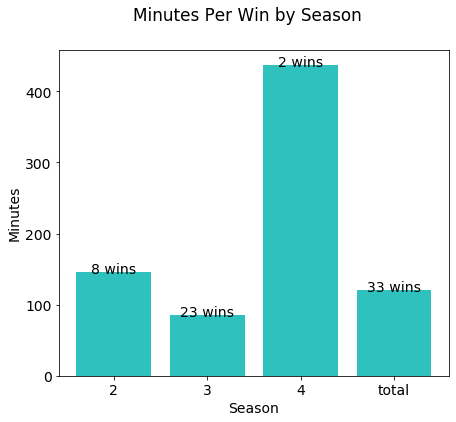

In [22]:
# Get a bar graph for average time per win by season and total
fgv.minutesPerWinBar(shows_info_df)

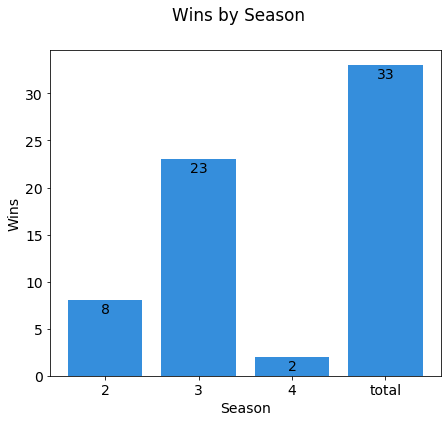

In [23]:
# Get a bar chart for wins by season
fgv.winsBySeasonBar(shows_info_df)

In [24]:
# Get win streaks (returns row ids for shows_df)
getStreaks(shows_df)

[[74, 75], [397, 398, 399]]

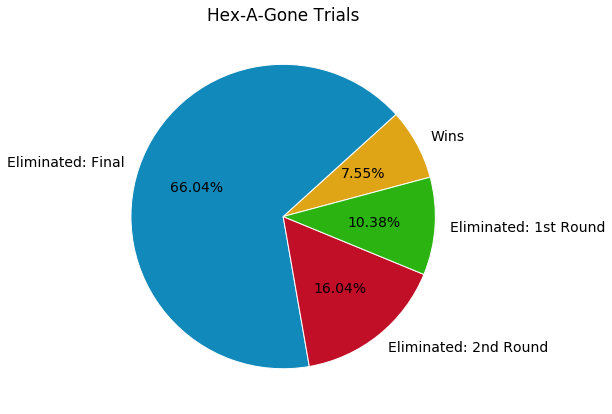

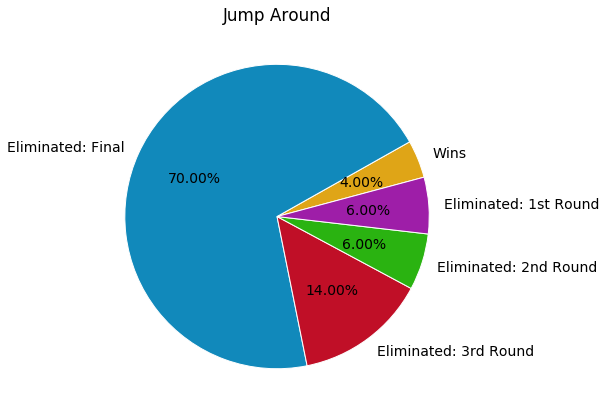

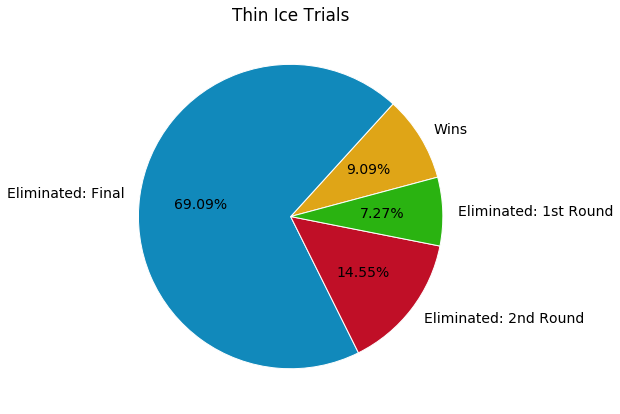

In [25]:
# Get a pie chart for success in playlists that are of the 'same' final
special_shows = ['event_only_floor_fall', 'event_only_jump_club', 'event_only_thin_ice']

for special_show in special_shows:
    fgv.specialShowsPie(special_show, shows_df, explode=False, percent=True)

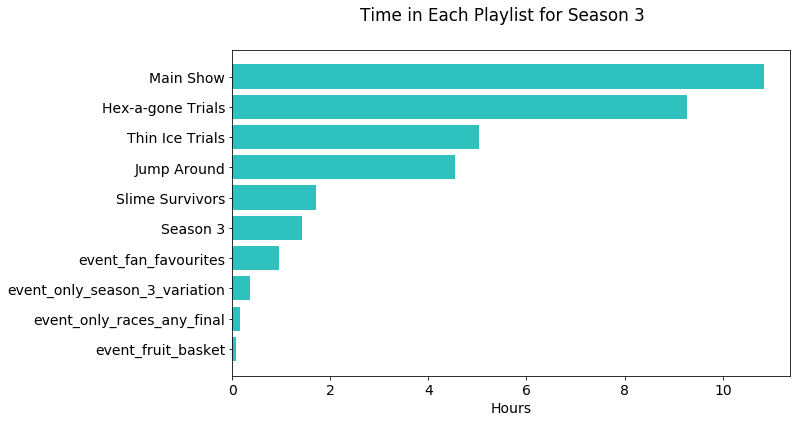

In [26]:
# Get a bar chart for playlist playtime for a season
fgv.seasonPlaylistTimeBar(shows_df, 3, True)

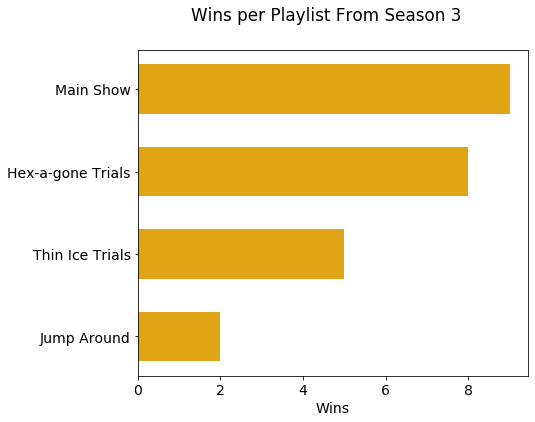

In [27]:
# Get a bar chart for wins per playlist from a season
fgv.seasonPlaylistWinsBar(shows_df, season=3)

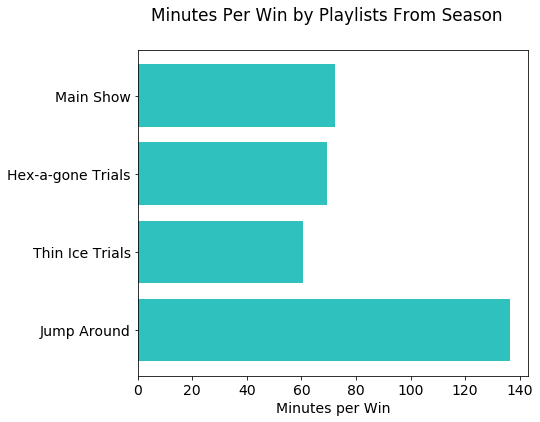

In [28]:
# Get a bar chart for minutes per win per playlist from a season
fgv.seasonPlaylistMinutesPerWinBar(shows_df, season=3)

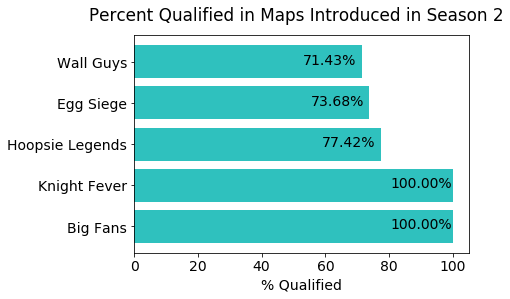

In [29]:
# Get a bar chart for percent qualified for maps introducted in a season
fgv.seasonMapsQualPercentBar(maps_df, season=2)

# side by side bars with attempts and times qualified?

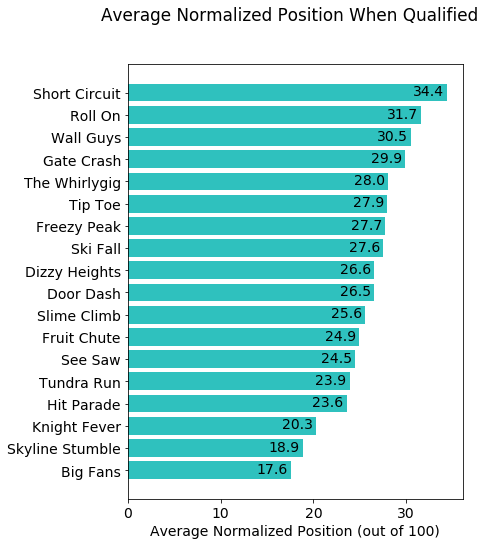

In [30]:
# Get a bar chart for average normalized position for race rounds when qualified
fgv.normalizedPositionRaceBar(maps_df)

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:415: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


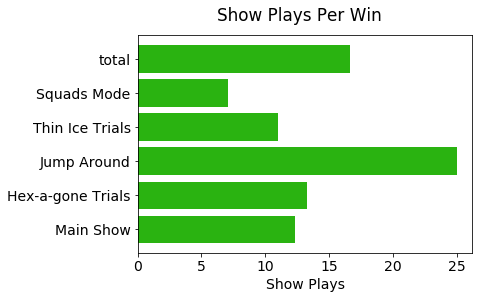

In [31]:
# Get a bar chart for plays per win for each playlist in a season (or overall)
fgv.playsPerWinPlaylistBar(shows_df, rounds_df, season=None, shorten=True)

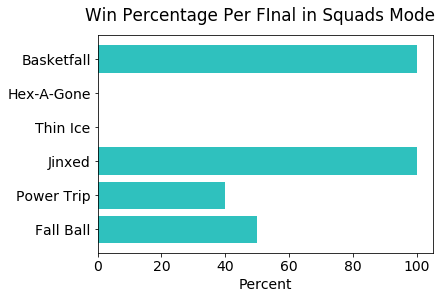

In [32]:
# Get a bar chart for win percentage in each final in Squads Mode
fgv.squadsFinalWinPercentBar(squad_shows_df, squad_rounds_df)

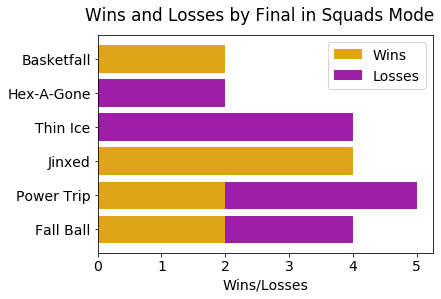

In [33]:
# Get a stacked bar plot for wins and fails per final in Squads Mode
fgv.squadsFinalStackedBar(squad_shows_df, squad_rounds_df)